In [ ]:
def AND(x1, x2):
    return int(x1 + x2 > 1.5)

def OR(x1, x2):
    return int(x1 + x2 > 0.5)

def XOR(x1, x2):
    y1 = OR(x1, x2)
    y2 = AND(x1, x2)
    return y1 and not y2

# Тест
for x1, x2 in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    print(f"XOR({x1}, {x2}) = {XOR(x1, x2)}")

XOR(0, 0) = 0
XOR(0, 1) = True
XOR(1, 0) = True
XOR(1, 1) = False


In [ ]:
# Імпортуємо необхідні бібліотеки
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Дані для функції XOR
# Входи
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Виходи (результати XOR)
y = np.array([[0], [1], [1], [0]])

# Створюємо модель
model = Sequential()

# Додаємо прихований шар з 2 нейронами, активаційна функція sigmoid
model.add(Dense(2, input_dim=2, activation='sigmoid'))

# Додаємо вихідний шар з 1 нейроном, активаційна функція sigmoid
model.add(Dense(1, activation='sigmoid'))

# Компілюємо модель
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Навчаємо модель
model.fit(X, y, epochs=10000, verbose=0)  # Виставляємо кількість епох 10000 для точності

# Тестуємо модель
print("Тестування моделі на функції XOR:")
print("0 XOR 0: ", model.predict(np.array([[0, 0]])))
print("0 XOR 1: ", model.predict(np.array([[0, 1]])))
print("1 XOR 0: ", model.predict(np.array([[1, 0]])))
print("1 XOR 1: ", model.predict(np.array([[1, 1]])))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Тестування моделі на функції XOR:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
0 XOR 0:  [[0.03382552]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
0 XOR 1:  [[0.97159517]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1 XOR 0:  [[0.96366996]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1 XOR 1:  [[0.03313703]]


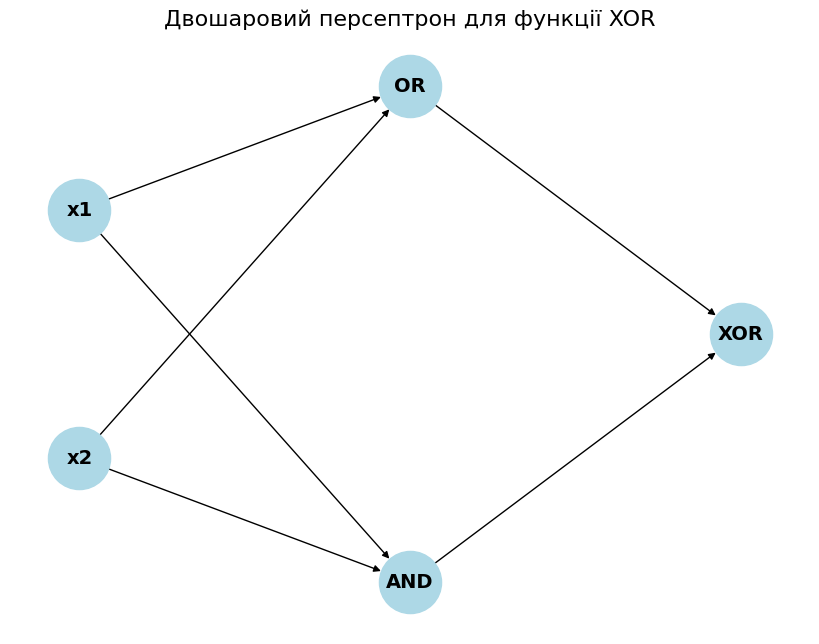

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Створення графа
G = nx.DiGraph()

# Додавання вузлів для вхідного шару
G.add_node('x1', pos=(0, 2))
G.add_node('x2', pos=(0, 0))

# Додавання вузлів для першого шару (нейрони OR та AND)
G.add_node('OR', pos=(2, 3))
G.add_node('AND', pos=(2, -1))

# Додавання вузла для другого шару (нейрон XOR)
G.add_node('XOR', pos=(4, 1))

# Зв'язки між шарами
G.add_edges_from([('x1', 'OR'), ('x2', 'OR')])
G.add_edges_from([('x1', 'AND'), ('x2', 'AND')])
G.add_edges_from([('OR', 'XOR'), ('AND', 'XOR')])

# Позиції вузлів
pos = nx.get_node_attributes(G, 'pos')

# Зображення персептрона
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=14, font_weight="bold", arrows=True)
plt.title('Двошаровий персептрон для функції XOR', fontsize=16)
plt.show()